<a href="https://colab.research.google.com/github/hsuanchengsun/Geographic-information-system/blob/main/Data_Preparation_Airbnb_Taipei_Taiwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation - Airbnb Taipei, Taiwan

In [ ]:
import os
import json
import shutil
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import arcgis
from arcgis.gis import GIS
from arcgis.mapping import WebMap, WebScene
from arcgis.features import FeatureLayer
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import arcpy 
from arcpy import env
from IPython.display import display
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/
# gis = GIS() # Connect to ArcGIS Online as an anonymous user
gis = GIS("home")
print("Successfully logged in as: " + gis.properties.user.username)

Successfully logged in as: hsuan-cheng.sun


## 1 - Project Understanding - define problem to be solved

Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California. Airbnb maintains and hosts a marketplace, accessible to consumers on its website or via an app. Through the service, users can arrange lodging, primarily homestays, and tourism experiences or list their properties for rental. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

Suppose you wanted to rent a place you owned.  Perhaps that place is your home.  Perhaps you like to vacation in a particular location and would like to buy a place there and off-set your expenses by renting that place.

#### How would you know how much you could charge for your rental?

Hopefully, these series of Python notebooks will help you answer that question.

This notebook deals with steps 1-3 of the CRISP-DM data science methodology, specifically, preparing the data for the analyses we will perform.  There are three analytic processes we will perform (regression, forest-based classification and regression, and density-based clustering).

## 2 - Data Understanding - collect, extract, datasets; review attributes; perform visual assessment

Inside Airbnb is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.  http://insideairbnb.com/about.html 

#### Get the Data: http://insideairbnb.com/get-the-data.html 


In [ ]:
# Create a folder
os.mkdir('/arcgis/home/Taiwan_airbnb')

In [ ]:
# Create a file geodatabase
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/create-file-gdb.htm#C_GUID-DB1C0BE8-EE77-4253-A7D2-7CCC5F803A7C
arcpy.CreateFileGDB_management('/arcgis/home/Taiwan_airbnb', 'Taiwan_airbnb_gdb.gdb')

<Result '/arcgis/home/Taiwan_airbnb/Taiwan_airbnb_gdb.gdb'>

In [ ]:
# Download and open the data in a dataframe
# Airbnb data: http://insideairbnb.com/get-the-data.html
pd.set_option("display.max_columns", None)
# df = pd.read_csv('/arcgis/home/san_diego_airbnb/listings.csv.gz')
df = pd.read_csv('http://data.insideairbnb.com/taiwan/northern-taiwan/taipei/2022-06-29/data/listings.csv.gz')
# Should include 3791 rows
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,644776503195741909,https://www.airbnb.com/rooms/644776503195741909,20220629160322,2022-06-29,(C3) 4th-floor 3-min from Dingxi MRT station,- 3 min away from Dingxi MRT station by walk<b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,18931547,https://www.airbnb.com/users/show/18931547,怡因,2014-07-26,Taiwan,"Hello~~ \n\nI'm Tracy, and I’m from Taiwan!\nI...",a few days or more,22%,59%,f,https://a0.muscache.com/im/users/18931547/prof...,https://a0.muscache.com/im/users/18931547/prof...,East Gate,90,90,"['email', 'phone']",t,f,NaN,中正區,NaN,25.01544,121.51568,Private room in condo,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Long term stays allo...",$336.00,30,1000,30.0,30.0,1000.0,1000.0,30.0,1000.0,NaN,t,30,60,90,365,2022-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,81,0,72,9,NaN
1,6758373,https://www.airbnb.com/rooms/6758373,20220629160322,2022-06-29,NEW~MRT 景平站 1秒 !房價優惠中。SKY HOME & 空の家～（1～6人）,永和賑やかなショッピング地区に位置しています。圏内にありLEROY。南勢角のナイトマーケット...,樂華.南勢角夜市<br />碧潭水岸公園<br />101.西門町.信義區.<br />士林...,https://a0.muscache.com/pictures/85904858/7a19...,30697687,https://www.airbnb.com/users/show/30697687,Anne,2015-04-06,"Zhonghe District, New Taipei City, Taiwan","Hi~ I'm anne, I am a pianoist! Like traveling,...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/30697687/prof...,https://a0.muscache.com/im/users/30697687/prof...,NaN,2,2,"['email', 'phone']",t,t,"Zhonghe District, New Taipei City, Taiwan",文山區,NaN,24.99133,121.51510,Entire loft,Entire home/apt,6,NaN,1.5 baths,1.0,2.0,"[""Microwave"", ""Cooking basics"", ""Dishes and si...","$3,350.00",2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,29,59,89,364,2022-06-29,27,0,0,2015-06-23,2021-05-10,4.63,4.70,4.48,4.74,4.70,4.56,4.56,NaN,t,2,2,0,0,0.32
2,575208707289966535,https://www.airbnb.com/rooms/575208707289966535,20220629160322,2022-06-29,台北橋捷運一分鐘大空間3B套房,入住這個地點絕佳的房源，輕鬆造訪各個好去處。,NaN,https://a0.muscache.com/pictures/839385b4-0056...,441856875,https://www.airbnb.com/users/show/441856875,Mary瑪麗,2022-01-24,TW,NaN,within an hour,95%,95%,f,https://a0.muscache.com/im/pictures/user/92c9d...,https://a0.muscache.com/im/pictures/user/92c9d...,Ximen,9,9,"['email', 'phone']",t,t,NaN,大同區,NaN,25.06357,121.49910,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...","$1,130.00",1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,365,2022-06-29,1,1,1,2022-06-26,2022-06-26,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,7,7,0,0,1.00
3,49282075,https://www.airbnb.com/rooms/49282075,20220629160322,2022-06-29,【NEW】台北捷運MRT/心動時刻/捷運1分鐘/全新裝潢/洗脫烘衣機、廚房/月租型/明亮舒適...,★ Taiwan High speed rail： Banqiao station 1st...,* 樓下一條街，5分鐘到達，嚐遍台灣在地美食<br

In [ ]:
# Let's look at the columns - there are 74...
for a,b,c,d in zip(df.columns[::4], df.columns[1::4],df.columns[2::4], df.columns[3::4]):
    print("{:<30}{:<30}{:<30}{:<}".format(a,b,c,d))

id                            listing_url                   scrape_id                     last_scraped
name                          description                   neighborhood_overview         picture_url
host_id                       host_url                      host_name                     host_since
host_location                 host_about                    host_response_time            host_response_rate
host_acceptance_rate          host_is_superhost             host_thumbnail_url            host_picture_url
host_neighbourhood            host_listings_count           host_total_listings_count     host_verifications
host_has_profile_pic          host_identity_verified        neighbourhood                 neighbourhood_cleansed
neighbourhood_group_cleansed  latitude                      longitude                     property_type
room_type                     accommodates                  bathrooms                     bathrooms_text
bedrooms                      beds             

In [ ]:
# Let's look at the column data types
pd.set_option("display.max_rows", None)
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

## 3 - Data Preparation - select data; correct, modify attributes; generate new attributes

In [ ]:
# Let's cleanup some of this data a bit...
# Change these percentages to numeric values
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
# Change price to a numeric value
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
# Change text to numeric value
df["host_is_superhost"] = df["host_is_superhost"].replace('f', 0)
df["host_is_superhost"] = df["host_is_superhost"].replace('t', 1)

In [ ]:
# Let's select some of the columns for our analyses: regression, forest-based classification and regression, and density-based clustering
# For regression, we need numeric data values, for forest-based classification and regression we can use both numeric and categorical data values
# And for all three we can use spatial data
df_cleaned_selected  = df[['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate',
                  'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count',
                  'neighbourhood_cleansed', 'latitude', 'longitude','property_type','room_type',
                  'accommodates','bathrooms_text','bedrooms','beds','amenities','price',
                  'minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']]
df_cleaned_selected.head(10)

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,644776503195741909,18931547,2014-07-26,a few days or more,0.22,0.59,0,90,中正區,25.01544,121.51568,Private room in condo,Private room,1,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Long term stays allo...",336.0,30,1000,0,NaN
1,6758373,30697687,2015-04-06,within an hour,1.00,1.00,0,2,文山區,24.99133,121.51510,Entire loft,Entire home/apt,6,1.5 baths,1.0,2.0,"[""Microwave"", ""Cooking basics"", ""Dishes and si...",3350.0,2,90,27,4.63
2,575208707289966535,441856875,2022-01-24,within an hour,0.95,0.95,0,9,大同區,25.06357,121.49910,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...",1130.0,1,365,1,5.00
3,49282075,298555382,2019-09-28,within an hour,1.00,0.94,0,9,萬華區,25.02249,121.46901,Entire condo,Entire home/apt,4,1.5 baths,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""D...",2029.0,3,1125,0,NaN
4,271733,242033,2010-09-22,within a day,1.00,0.50,0,0,文山區,25.00581,121.55518,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Conditioner"", ""Cooking basics"", ""Carbon mono...",920.0,14,182,64,4.97
5,289296,1338052,2011-10-26,within an hour,1.00,1.00,0,3,大安區,25.04287,121.55112,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hot water"", ""Fire extinguisher"", ""Iron"", ""Dr...",2465.0,28,1125,25,4.68
6,310542,1597675,2012-01-12,a few days or more,0.33,NaN,0,6,南港區,25.04903,121.58179,Shared room in rental unit,Shared room,6,1.5 shared baths,1.0,8.0,"[""Room-darkening shades"", ""Microwave"", ""Cookin...",300.0,30,360,15,4.14
7,333362,1698423,2012-02-04,NaN,NaN,NaN,0,1,中山區,25.07893,121.55061,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Dryer"", ""Long term stays allowed"", ""Shampoo""...",1294.0,365,565,79,4.77
8,357836,1398361,2011-11-12,within an hour,1.00,1.00,1,11,大安區,25.02703,121.54437,Entire condo,Entire home/apt,4,1 bath,2.0,2.0,"[""Microwave"", ""Lockbox"", ""Carbon monoxide alar...",2672.0,29,365,123,4.66
9,375718,1398361,2011-11-12,within an hour,1.00,1.00,1,11,大安區,25.04178,121.55100,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Cooking basics"", ""Carbon monoxide alarm"", ""T...",2999.0,2,365,6,4.60


In [ ]:
# Let's remove missing values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df_remove_missing_values = df_cleaned_selected.dropna()
df_remove_missing_values.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
1,6758373,30697687,2015-04-06,within an hour,1.00,1.00,0,2,文山區,24.99133,121.51510,Entire loft,Entire home/apt,6,1.5 baths,1.0,2.0,"[""Microwave"", ""Cooking basics"", ""Dishes and si...",3350.0,2,90,27,4.63
2,575208707289966535,441856875,2022-01-24,within an hour,0.95,0.95,0,9,大同區,25.06357,121.49910,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...",1130.0,1,365,1,5.00
4,271733,242033,2010-09-22,within a day,1.00,0.50,0,0,文山區,25.00581,121.55518,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Conditioner"", ""Cooking basics"", ""Carbon mono...",920.0,14,182,64,4.97
5,289296,1338052,2011-10-26,within an hour,1.00,1.00,0,3,大安區,25.04287,121.55112,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hot water"", ""Fire extinguisher"", ""Iron"", ""Dr...",2465.0,28,1125,25,4.68
8,357836,1398361,2011-11-12,within an hour,1.00,1.00,1,11,大安區,25.02703,121.54437,Entire condo,Entire home/apt,4,1 bath,2.0,2.0,"[""Microwave"", ""Lockbox"", ""Carbon monoxide alar...",2672.0,29,365,123,4.66


In [ ]:
# Create "df_remove_missing_values_selected" with numeric values only from "df_remove_missing_values"
# so we can remove any outliers - next step...
df_remove_missing_values_selected  = df_remove_missing_values[['id', 'host_id', 'host_response_rate','host_acceptance_rate', 'host_is_superhost',
                           'host_total_listings_count','accommodates','bedrooms','beds','price','minimum_nights',
                           'maximum_nights','number_of_reviews','review_scores_rating']]
df_remove_missing_values_selected.head(10)

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
1,6758373,30697687,1.00,1.00,0,2,6,1.0,2.0,3350.0,2,90,27,4.63
2,575208707289966535,441856875,0.95,0.95,0,9,2,1.0,1.0,1130.0,1,365,1,5.00
4,271733,242033,1.00,0.50,0,0,2,2.0,2.0,920.0,14,182,64,4.97
5,289296,1338052,1.00,1.00,0,3,4,2.0,2.0,2465.0,28,1125,25,4.68
8,357836,1398361,1.00,1.00,1,11,4,2.0,2.0,2672.0,29,365,123,4.66
9,375718,1398361,1.00,1.00,1,11,2,1.0,1.0,2999.0,2,365,6,4.60
10,375720,1398361,1.00,1.00,1,11,3,1.0,2.0,1718.0,29,365,102,4.65
15,837558,4377110,1.00,0.83,0,8,2,1.0,1.0,1739.0,3,365,7,5.00
16,840983,4377110,1.00,0.83,0,8,4,1.0,2.0,2325.0,30,365,4,5.00
18,858235,4377110,1.00,0.83,0,8,2,1.0,1.0,1578.0,4,365,13,4.42


In [ ]:
# Remove outliers from above...
# An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.
# Removing outliers from a pandas.DataFrame removes any rows in the DataFrame which contain an outlier.
# Outlier calculations are performed separately for each column.

from scipy import stats
z_scores = stats.zscore(df_remove_missing_values_selected)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_final_cleaned = df_remove_missing_values_selected[filtered_entries]
df_final_cleaned.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
1,6758373,30697687,1.0,1.0,0,2,6,1.0,2.0,3350.0,2,90,27,4.63
4,271733,242033,1.0,0.5,0,0,2,2.0,2.0,920.0,14,182,64,4.97
5,289296,1338052,1.0,1.0,0,3,4,2.0,2.0,2465.0,28,1125,25,4.68
8,357836,1398361,1.0,1.0,1,11,4,2.0,2.0,2672.0,29,365,123,4.66
9,375718,1398361,1.0,1.0,1,11,2,1.0,1.0,2999.0,2,365,6,4.60


In [ ]:
# Let's look at the column data types again
df_final_cleaned.dtypes

id                             int64
host_id                        int64
host_response_rate           float64
host_acceptance_rate         float64
host_is_superhost              int64
host_total_listings_count      int64
accommodates                   int64
bedrooms                     float64
beds                         float64
price                        float64
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
review_scores_rating         float64
dtype: object

In [ ]:
df_final_cleaned.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,1417.0,2.633231e+07,1.460858e+07,271733.00,14070859.00,26054202.00,3.904266e+07,54383857.0
host_id,1417.0,1.038887e+08,1.079716e+08,51827.00,21506709.00,58666148.00,1.711121e+08,438984915.0
host_response_rate,1417.0,9.412068e-01,1.317334e-01,0.14,0.96,1.00,1.000000e+00,1.0
host_acceptance_rate,1417.0,7.766126e-01,3.079676e-01,0.00,0.65,0.93,1.000000e+00,1.0
host_is_superhost,1417.0,3.599153e-01,4.801447e-01,0.00,0.00,0.00,1.000000e+00,1.0
host_total_listings_count,1417.0,8.905434e+00,8.671717e+00,0.00,2.00,6.00,1.300000e+01,42.0
accommodates,1417.0,3.380381e+00,2.294672e+00,1.00,2.00,2.00,4.000000e+00,12.0
bedrooms,1417.0,1.306987e+00,6.285694e-01,1.00,1.00,1.00,1.000000e+00,3.0
beds,1417.0,2.049400e+00,1.574995e+00,1.00,1.00,1.00,2.000000e+00,10.0
price,1417.0,1.865667e+03,1.319028e+03,279.00,918.00,1500.00,2.390000e+03,8272.0


In [ ]:
# Create "df_other" with the remaining attributes from "df_cleaned_selected"
df_other = df_cleaned_selected[['host_since', 'host_response_time', 'neighbourhood_cleansed', 
                                'latitude', 'longitude','property_type','room_type', 'bathrooms_text','amenities']]
df_other.head(10)

,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities
0,2014-07-26,a few days or more,中正區,25.01544,121.51568,Private room in condo,Private room,1 shared bath,"[""Lock on bedroom door"", ""Long term stays allo..."
1,2015-04-06,within an hour,文山區,24.99133,121.51510,Entire loft,Entire home/apt,1.5 baths,"[""Microwave"", ""Cooking basics"", ""Dishes and si..."
2,2022-01-24,within an hour,大同區,25.06357,121.49910,Entire condo,Entire home/apt,1 bath,"[""Dedicated workspace"", ""Long term stays allow..."
3,2019-09-28,within an hour,萬華區,25.02249,121.46901,Entire condo,Entire home/apt,1.5 baths,"[""Room-darkening shades"", ""Cooking basics"", ""D..."
4,2010-09-22,within a day,文山區,25.00581,121.55518,Entire rental unit,Entire home/apt,1 bath,"[""Conditioner"", ""Cooking basics"", ""Carbon mono..."
5,2011-10-26,within an hour,大安區,25.04287,121.55112,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Fire extinguisher"", ""Iron"", ""Dr..."
6,2012-01-12,a few days or more,南港區,25.04903,121.58179,Shared room in rental unit,Shared room,1.5 shared baths,"[""Room-darkening shades"", ""Microwave"", ""Cookin..."
7,2012-02-04,NaN,中山區,25.07893,121.55061,Entire rental unit,Entire home/apt,1 bath,"[""Dryer"", ""Long term stays allowed"", ""Shampoo""..."
8,2011-11-12,within an hour,大安區,25.02703,121.54437,Entire condo,Entire home/apt,1 bath,"[""Microwave"", ""Lockbox"", ""Carbon monoxide alar..."
9,2011-11-12,within an hour,大安區,25.04178,121.55100,Entire condo,Entire home/apt,1 bath,"[""Cooking basics"", ""Carbon monoxide alarm"", ""T..."


In [ ]:
# Let's put this back together...
df_final_cleaned_merged = df_final_cleaned.merge(df_other, left_index=True, right_index=True,)
df_final_cleaned_merged.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities
1,6758373,30697687,1.0,1.0,0,2,6,1.0,2.0,3350.0,2,90,27,4.63,2015-04-06,within an hour,文山區,24.99133,121.51510,Entire loft,Entire home/apt,1.5 baths,"[""Microwave"", ""Cooking basics"", ""Dishes and si..."
4,271733,242033,1.0,0.5,0,0,2,2.0,2.0,920.0,14,182,64,4.97,2010-09-22,within a day,文山區,25.00581,121.55518,Entire rental unit,Entire home/apt,1 bath,"[""Conditioner"", ""Cooking basics"", ""Carbon mono..."
5,289296,1338052,1.0,1.0,0,3,4,2.0,2.0,2465.0,28,1125,25,4.68,2011-10-26,within an hour,大安區,25.04287,121.55112,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Fire extinguisher"", ""Iron"", ""Dr..."
8,357836,1398361,1.0,1.0,1,11,4,2.0,2.0,2672.0,29,365,123,4.66,2011-11-12,within an hour,大安區,25.02703,121.54437,Entire condo,Entire home/apt,1 bath,"[""Microwave"", ""Lockbox"", ""Carbon monoxide alar..."
9,375718,1398361,1.0,1.0,1,11,2,1.0,1.0,2999.0,2,365,6,4.60,2011-11-12,within an hour,大安區,25.04178,121.55100,Entire condo,Entire home/apt,1 bath,"[""Cooking basics"", ""Carbon monoxide alarm"", ""T..."


In [ ]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Numeric data 
df_final_cleaned_merged.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,1417.0,2.633231e+07,1.460858e+07,271733.00000,1.407086e+07,2.605420e+07,3.904266e+07,5.438386e+07
host_id,1417.0,1.038887e+08,1.079716e+08,51827.00000,2.150671e+07,5.866615e+07,1.711121e+08,4.389849e+08
host_response_rate,1417.0,9.412068e-01,1.317334e-01,0.14000,9.600000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,1417.0,7.766126e-01,3.079676e-01,0.00000,6.500000e-01,9.300000e-01,1.000000e+00,1.000000e+00
host_is_superhost,1417.0,3.599153e-01,4.801447e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
host_total_listings_count,1417.0,8.905434e+00,8.671717e+00,0.00000,2.000000e+00,6.000000e+00,1.300000e+01,4.200000e+01
accommodates,1417.0,3.380381e+00,2.294672e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.200000e+01
bedrooms,1417.0,1.306987e+00,6.285694e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
beds,1417.0,2.049400e+00,1.574995e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
price,1417.0,1.865667e+03,1.319028e+03,279.00000,9.180000e+02,1.500000e+03,2.390000e+03,8.272000e+03


In [ ]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Categorical data 
df_final_cleaned_merged.describe(include=[object]).T

,count,unique,top,freq
host_since,1417,487,2019-02-12,29
host_response_time,1417,4,within an hour,907
neighbourhood_cleansed,1417,12,大安區,254
property_type,1417,37,Entire rental unit,428
room_type,1417,4,Entire home/apt,736
bathrooms_text,1417,33,1 bath,558
amenities,1417,1275,"[""Fire extinguisher"", ""Iron"", ""Dryer"", ""Hanger...",8


In [ ]:
# How many neighbourhoods are there and how many listings are in each?
df_final_cleaned_merged['neighbourhood_cleansed'].value_counts()

大安區    254
中正區    233
萬華區    217
中山區    189
信義區    146
士林區     87
大同區     82
松山區     61
文山區     60
北投區     38
內湖區     33
南港區     17
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
# Let's create a spatial feature layer
# Since we're using lat/lon data we set the set the spatial reference to WGS84 (4326)
# https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/coordinate-systems-and-projections.htm
# https://spatialreference.org/ref/epsg/wgs-84/
sdf = pd.DataFrame.spatial.from_xy(df_final_cleaned_merged, x_column = 'longitude', y_column = 'latitude', sr=4326)
sdf.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,SHAPE
1,6758373,30697687,1.0,1.0,0,2,6,1.0,2.0,3350.0,2,90,27,4.63,2015-04-06,within an hour,文山區,24.99133,121.51510,Entire loft,Entire home/apt,1.5 baths,"[""Microwave"", ""Cooking basics"", ""Dishes and si...","{""spatialReference"": {""wkid"": 4326}, ""x"": 121...."
4,271733,242033,1.0,0.5,0,0,2,2.0,2.0,920.0,14,182,64,4.97,2010-09-22,within a day,文山區,25.00581,121.55518,Entire rental unit,Entire home/apt,1 bath,"[""Conditioner"", ""Cooking basics"", ""Carbon mono...","{""spatialReference"": {""wkid"": 4326}, ""x"": 121...."
5,289296,1338052,1.0,1.0,0,3,4,2.0,2.0,2465.0,28,1125,25,4.68,2011-10-26,within an hour,大安區,25.04287,121.55112,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Fire extinguisher"", ""Iron"", ""Dr...","{""spatialReference"": {""wkid"": 4326}, ""x"": 121...."
8,357836,1398361,1.0,1.0,1,11,4,2.0,2.0,2672.0,29,365,123,4.66,2011-11-12,within an hour,大安區,25.02703,121.54437,Entire condo,Entire home/apt,1 bath,"[""Microwave"", ""Lockbox"", ""Carbon monoxide alar...","{""spatialReference"": {""wkid"": 4326}, ""x"": 121...."
9,375718,1398361,1.0,1.0,1,11,2,1.0,1.0,2999.0,2,365,6,4.60,2011-11-12,within an hour,大安區,25.04178,121.55100,Entire condo,Entire home/apt,1 bath,"[""Cooking basics"", ""Carbon monoxide alarm"", ""T...","{""spatialReference"": {""wkid"": 4326}, ""x"": 121...."


In [ ]:
# Let's create a new feature class "san_diego_airbnb_listings_for_analysis" and add it to our geodatabase
sdf.spatial.to_featureclass(location=r'/arcgis/home/Taiwan_airbnb/Taiwan_airbnb_gdb.gdb/Taiwan_airbnb_listings_for_analysis');

In [ ]:
# Let's see if the data is there
file_geodatabase = env.workspace = ('/arcgis/home/Taiwan_airbnb/Taiwan_airbnb_gdb.gdb')
list_features = arcpy.ListFeatureClasses()
list_features

['Taiwan_airbnb_listings_for_analysis']

In [ ]:
# Set the path to the "san_diego_airbnb_listings" data
sd_airbnb_data = file_geodatabase + '/Taiwan_airbnb_listings_for_analysis'

In [ ]:
# Let's check and make sure our data is OK...
# https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
sdf = pd.DataFrame.spatial.from_featureclass(sd_airbnb_data)
sdf.head()

,OBJECTID,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,SHAPE
0,1,6758373.0,30697687.0,1.0,1.0,0.0,2.0,6.0,1.0,2.0,3350.0,2.0,90.0,27.0,4.63,2015-04-06,within an hour,文山區,24.99133,121.51510,Entire loft,Entire home/apt,1.5 baths,"[""Microwave"", ""Cooking basics"", ""Dishes and si...","{""x"": 121.51510000000007, ""y"": 24.991330000000..."
1,2,271733.0,242033.0,1.0,0.5,0.0,0.0,2.0,2.0,2.0,920.0,14.0,182.0,64.0,4.97,2010-09-22,within a day,文山區,25.00581,121.55518,Entire rental unit,Entire home/apt,1 bath,"[""Conditioner"", ""Cooking basics"", ""Carbon mono...","{""x"": 121.55518000000006, ""y"": 25.005810000000..."
2,3,289296.0,1338052.0,1.0,1.0,0.0,3.0,4.0,2.0,2.0,2465.0,28.0,1125.0,25.0,4.68,2011-10-26,within an hour,大安區,25.04287,121.55112,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Fire extinguisher"", ""Iron"", ""Dr...","{""x"": 121.55112000000008, ""y"": 25.042870000000..."
3,4,357836.0,1398361.0,1.0,1.0,1.0,11.0,4.0,2.0,2.0,2672.0,29.0,365.0,123.0,4.66,2011-11-12,within an hour,大安區,25.02703,121.54437,Entire condo,Entire home/apt,1 bath,"[""Microwave"", ""Lockbox"", ""Carbon monoxide alar...","{""x"": 121.54437000000007, ""y"": 25.027030000000..."
4,5,375718.0,1398361.0,1.0,1.0,1.0,11.0,2.0,1.0,1.0,2999.0,2.0,365.0,6.0,4.60,2011-11-12,within an hour,大安區,25.04178,121.55100,Entire condo,Entire home/apt,1 bath,"[""Cooking basics"", ""Carbon monoxide alarm"", ""T...","{""x"": 121.55100000000004, ""y"": 25.041780000000..."


In [ ]:
# Here we can see that two fields were added when the feature class was created: OBJECTID and SHAPE
sdf.dtypes

OBJECTID                        int64
id                            float64
host_id                       float64
host_response_rate            float64
host_acceptance_rate          float64
host_is_superhost             float64
host_total_listings_count     float64
accommodates                  float64
bedrooms                      float64
beds                          float64
price                         float64
minimum_nights                float64
maximum_nights                float64
number_of_reviews             float64
review_scores_rating          float64
host_since                     object
host_response_time             object
neighbourhood_cleansed         object
latitude                      float64
longitude                     float64
property_type                  object
room_type                      object
bathrooms_text                 object
amenities                      object
SHAPE                        geometry
dtype: object

In [ ]:
sdf.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,1417.0,7.090000e+02,4.091970e+02,1.00000,3.550000e+02,7.090000e+02,1.063000e+03,1.417000e+03
id,1417.0,2.633231e+07,1.460858e+07,271733.00000,1.407086e+07,2.605420e+07,3.904266e+07,5.438386e+07
host_id,1417.0,1.038887e+08,1.079716e+08,51827.00000,2.150671e+07,5.866615e+07,1.711121e+08,4.389849e+08
host_response_rate,1417.0,9.412068e-01,1.317334e-01,0.14000,9.600000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,1417.0,7.766126e-01,3.079676e-01,0.00000,6.500000e-01,9.300000e-01,1.000000e+00,1.000000e+00
host_is_superhost,1417.0,3.599153e-01,4.801447e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
host_total_listings_count,1417.0,8.905434e+00,8.671717e+00,0.00000,2.000000e+00,6.000000e+00,1.300000e+01,4.200000e+01
accommodates,1417.0,3.380381e+00,2.294672e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.200000e+01
bedrooms,1417.0,1.306987e+00,6.285694e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
beds,1417.0,2.049400e+00,1.574995e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01


In [ ]:
sdf.describe(include=[object]).T

,count,unique,top,freq
host_since,1417,487,2019-02-12,29
host_response_time,1417,4,within an hour,907
neighbourhood_cleansed,1417,12,大安區,254
property_type,1417,37,Entire rental unit,428
room_type,1417,4,Entire home/apt,736
bathrooms_text,1417,33,1 bath,558
amenities,1417,1275,"[""Fire extinguisher"", ""Iron"", ""Dryer"", ""Hanger...",8


In [ ]:
df_for_numeric = sdf[['price','host_response_rate','host_acceptance_rate','host_is_superhost', 'host_total_listings_count',
                     'accommodates','bedrooms','beds','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']]

In [ ]:
df_for_categorical = sdf[['price','host_response_time','property_type','room_type','bathrooms_text']]

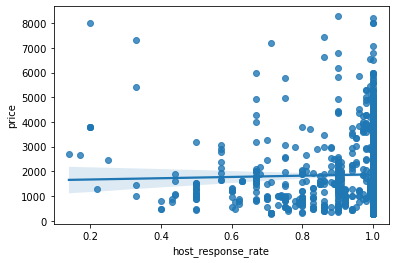

In [ ]:
ax = sns.regplot(x='host_response_rate', y='price', data = df_for_numeric);

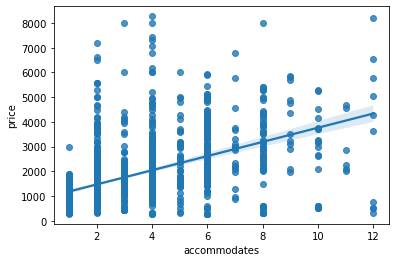

In [ ]:
ax = sns.regplot(x='accommodates', y='price', data = df_for_numeric);

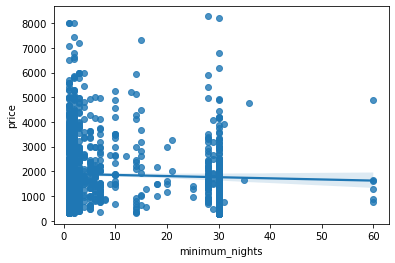

In [ ]:
ax = sns.regplot(x='minimum_nights', y='price', data = df_for_numeric);

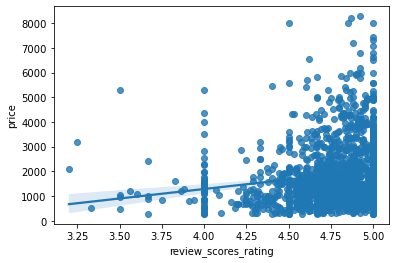

In [ ]:
ax = sns.regplot(x='review_scores_rating', y="price", data = df_for_numeric);

In [ ]:
# Let's set the price attribute value to near the average price of ~2000 NTD
df_for_numeric_v1 = df_for_numeric[df_for_numeric['price'] < 2000]

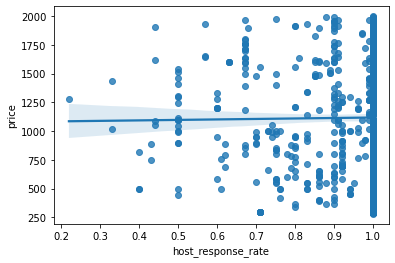

In [ ]:
ax = sns.regplot(x='host_response_rate', y='price', data = df_for_numeric_v1);

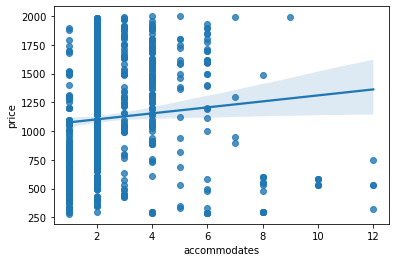

In [ ]:
ax = sns.regplot(x='accommodates', y='price', data = df_for_numeric_v1);

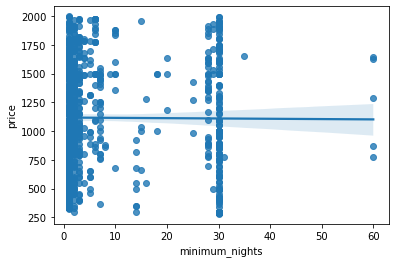

In [ ]:
ax = sns.regplot(x='minimum_nights', y='price', data = df_for_numeric_v1);

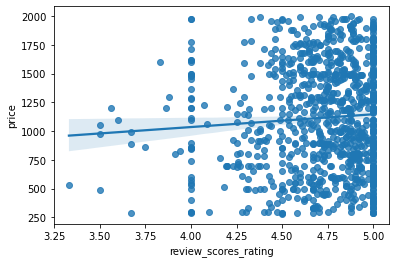

In [ ]:
ax = sns.regplot(x='review_scores_rating', y='price', data = df_for_numeric_v1);

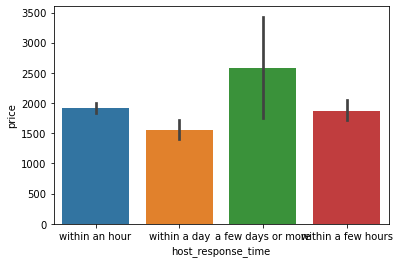

In [ ]:
ax = sns.barplot(x='host_response_time', y='price', data = df_for_categorical);

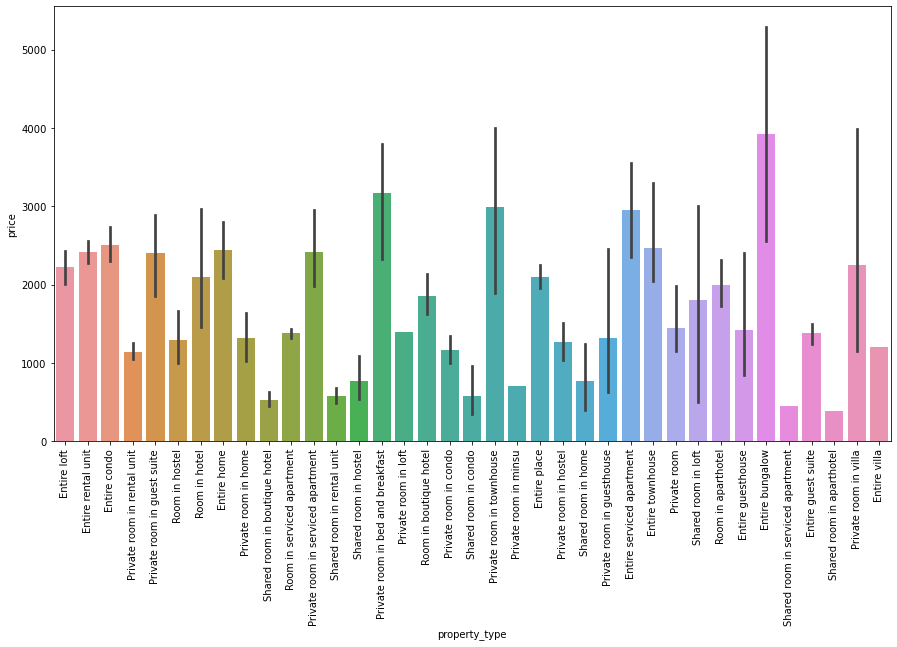

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.barplot(x='property_type', y='price', data = df_for_categorical);

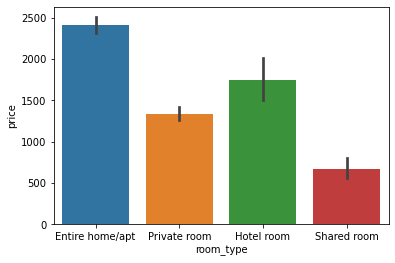

In [ ]:
ax = sns.barplot(x='room_type', y='price', data = df_for_categorical);

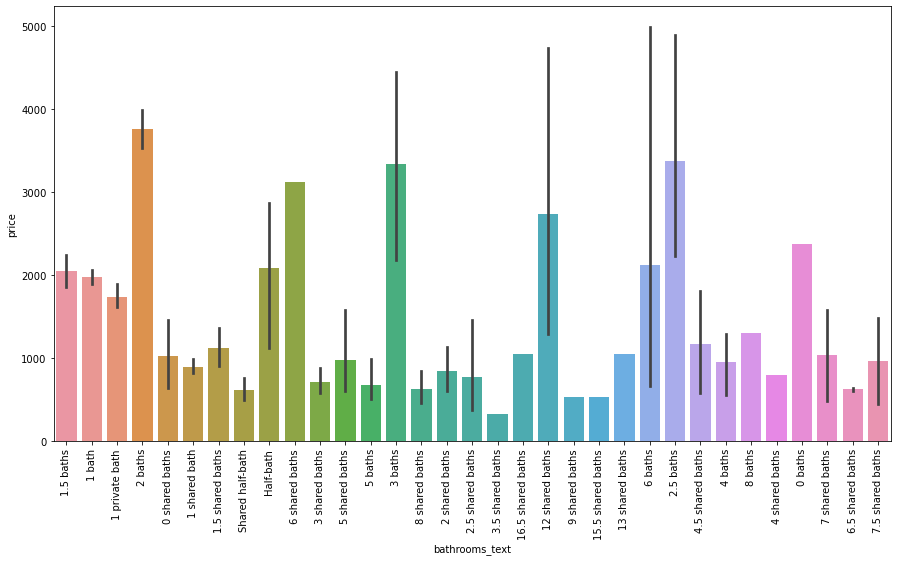

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.barplot(x='bathrooms_text', y='price', data = df_for_categorical);

In [ ]:
# Let's select 100 records...
sdf2 = sdf.head(100)

In [ ]:
# Let's add the data to a map to see how it looks...
m1 = GIS().map("Taipei")
m1.zoom = 9
m1.center = [39,-117]
sdf2.spatial.plot(map_widget = m1)
m1

MapView(layout=Layout(height='400px', width='100%'))